**Data mining and analysis platform for ivestment recommendations**

In [1]:
#import the required libraries

import time
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_ta as ta

import warnings
warnings.filterwarnings('ignore')

In [2]:
#create a function that read the data from yahoo website

def get_stock_data(ticker, year, month, day, interval):
    
    start = int(time.mktime(datetime.datetime(year, month, day, 23, 59).timetuple()))
    end = int(time.mktime(datetime.datetime.now().timetuple()))

    query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={start}&period2={end}&interval={interval}&events=history&includeAdjustedClose=true'
    return pd.read_csv(query_string)

In [3]:
#getting input from the user

ticker_name = input("Enter the company's ticker here: ")
start_day = int(input("Enter the starting day: "))
start_month = int(input("Enter the starting month: "))
start_year = int(input("Enter the starting year: "))
interval = input("Enter the interval (ie. for day - '1d',month - '1mo', week - '1wk)': ")

stock_data = get_stock_data(ticker_name, start_year, start_month, start_day, interval)

Enter the company's ticker here:  ITC.NS
Enter the starting day:  1
Enter the starting month:  1
Enter the starting year:  2021
Enter the interval (ie. for day - '1d',month - '1mo', week - '1wk)':  1d


In [4]:
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-01,209.899994,214.199997,209.300003,213.850006,183.908066,19527333
1,2021-01-04,214.000000,216.000000,212.100006,213.399994,183.521072,26891799
2,2021-01-05,212.449997,213.250000,210.600006,211.449997,181.844070,18024083
3,2021-01-06,211.449997,211.500000,204.500000,205.399994,176.641159,49067837
4,2021-01-07,206.100006,207.600006,202.100006,202.800003,174.405212,34952401
...,...,...,...,...,...,...,...
854,2024-06-20,424.049988,426.500000,421.500000,423.299988,423.299988,14585806
855,2024-06-21,425.000000,425.299988,418.549988,419.600006,419.600006,25205627
856,2024-06-24,420.000000,423.950012,420.000000,423.299988,423.299988,9362433
857,2024-06-25,423.000000,424.000000,419.750000,423.299988,423.299988,10260449


**Exploratory Data Analysis and Technical Analysis**

In [5]:
class stock_analysis:
    
    def __init__(self, stock):
        self.stock = stock
        
    def stock_info(self):
        self.stock['Date'] = pd.to_datetime(self.stock['Date'])
    
        #summarizing stat
        print('statistical summarization of data')
        print(self.stock.describe())
        print("----"*20)
    
        # metadata of dataset
        print("Metadata of the dataset:\n")
        self.stock.info()
        print("----"*20)
    
        # missing values
        null = self.stock.isnull().sum()
        print(null)
        print("----"*20)
    
        # max range of stocks dataset
        delta = (pd.to_datetime(self.stock['Date']).max() - pd.to_datetime(self.stock['Date']).min())
        print("Time range of stocks dataset:\n", delta)
        print("----"*20) 

    def momentum_indicators(self):
        plt.figure(figsize=(12, 15))

        # Relative Strength Index (RSI)
        rsi = self.stock.ta.rsi(close="Close", length=14, append=True)
        plt.subplot(411)
        plt.plot(self.stock['Date'], rsi)
        plt.axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
        plt.axhline(y=30, color='g', linestyle='--', label='Oversold (30)')
        plt.title('Relative Strength Index (RSI)')
        plt.xlabel('Date')
        plt.ylabel('RSI')
        plt.legend()
        plt.grid(True)

        # Stochastic Oscillator (STOCH)
        stoch = self.stock.ta.stoch(close='Close', high='High', low='Low', append=True)
        plt.subplot(412)
        plt.plot(self.stock['Date'], self.stock['STOCHk_14_3_3'], label='STOCHk_14_3_3')
        plt.plot(self.stock['Date'], self.stock['STOCHd_14_3_3'], label='STOCHd_14_3_3')
        plt.axhline(y=80, color='r', linestyle='--', label='Overbought (80)')
        plt.axhline(y=20, color='g', linestyle='--', label='Oversold (20)')
        plt.title('Stochastic Oscillator (STOCH)')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.legend()
        plt.grid(True)

        # Ultimate Oscillator (UO)
        uo = self.stock.ta.uo(close='Close', high='High', low='Low', append=True)
        plt.subplot(413)
        plt.plot(self.stock['Date'], self.stock['UO_7_14_28'], label='UO')
        plt.axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
        plt.axhline(y=30, color='g', linestyle='--', label='Oversold (30)')
        plt.title('Ultimate Oscillator (UO)')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.legend()
        plt.grid(True)

        # Williams %R (WILLR)
        willr = self.stock.ta.willr(close='Close', high='High', low='Low', append=True)
        plt.subplot(414)
        plt.plot(self.stock['Date'], willr, label='Williams %R')
        plt.axhline(y=-20, color='r', linestyle='--', label='Overbought (-20)')
        plt.axhline(y=-80, color='g', linestyle='--', label='Oversold (-80)')
        plt.title('Williams %R (WILLR)')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.legend()
        plt.grid(True)

        # Adjust layout and show plot
        plt.tight_layout()
        plt.show()

    def calculate_latest_momentum_values(self):
        df = self.stock
        # Extract the last row of the DataFrame to get the latest values
        latest_values = df.iloc[-1]
        
        # Select the relevant columns containing the momentum indicators
        momentum_columns = ['RSI_14', 'STOCHk_14_3_3', 'STOCHd_14_3_3', 'UO_7_14_28', 'WILLR_14']
        
        # Construct a new DataFrame with the latest values of each momentum indicator
        latest_momentum_values = pd.DataFrame({momentum_column: latest_values[momentum_column] for momentum_column in momentum_columns}, index=['Value'])
        
        # Set the index name
        latest_momentum_values.index.name = 'Momentum Indicator'
        
        # Transpose the DataFrame to have indicator names as index and value in a single column
        latest_momentum_values = latest_momentum_values.T.rename(columns={'Value': 'Latest Value'})
        
        # Add a new column indicating buy or sell based on threshold values
        latest_momentum_values['Signal'] = 'Hold'  # Initialize all signals to 'Hold'
        
        # Define threshold values for each momentum indicator
        thresholds = {'RSI_14': (30, 70), 'STOCHk_14_3_3': (20, 70), 'STOCHd_14_3_3': (20, 80), 'UO_7_14_28': (30, 70), 'WILLR_14': (-80, -20)}
        
        # Update signals based on threshold values
        for momentum_indicator, (lower_threshold, upper_threshold) in thresholds.items():
            value = latest_momentum_values.loc[momentum_indicator, 'Latest Value']
            if value <= lower_threshold:
                latest_momentum_values.at[momentum_indicator, 'Signal'] = 'Buy'
            elif value >= upper_threshold:
                latest_momentum_values.at[momentum_indicator, 'Signal'] = 'Sell'
        
        return latest_momentum_values
        


In [6]:
info = stock_analysis(stock_data)

In [7]:
info.stock_info()

statistical summarization of data
                                Date        Open        High         Low  \
count                            859  859.000000  859.000000  859.000000   
mean   2022-09-26 11:57:29.126892032  325.576717  328.463795  322.360652   
min              2021-01-01 00:00:00  201.199997  201.850006  199.100006   
25%              2021-11-15 12:00:00  223.025002  226.149994  221.099998   
50%              2022-09-26 00:00:00  330.350006  333.299988  328.000000   
75%              2023-08-07 12:00:00  429.050003  431.899994  425.500000   
max              2024-06-26 00:00:00  493.450012  499.700012  487.000000   
std                              NaN   96.389822   96.798307   95.537069   

            Close   Adj Close        Volume  
count  859.000000  859.000000  8.590000e+02  
mean   325.327823  308.098115  1.866434e+07  
min    199.600006  173.287262  3.170564e+06  
25%    222.974998  201.624130  9.654206e+06  
50%    330.500000  313.141571  1.387721e+07  
75%  

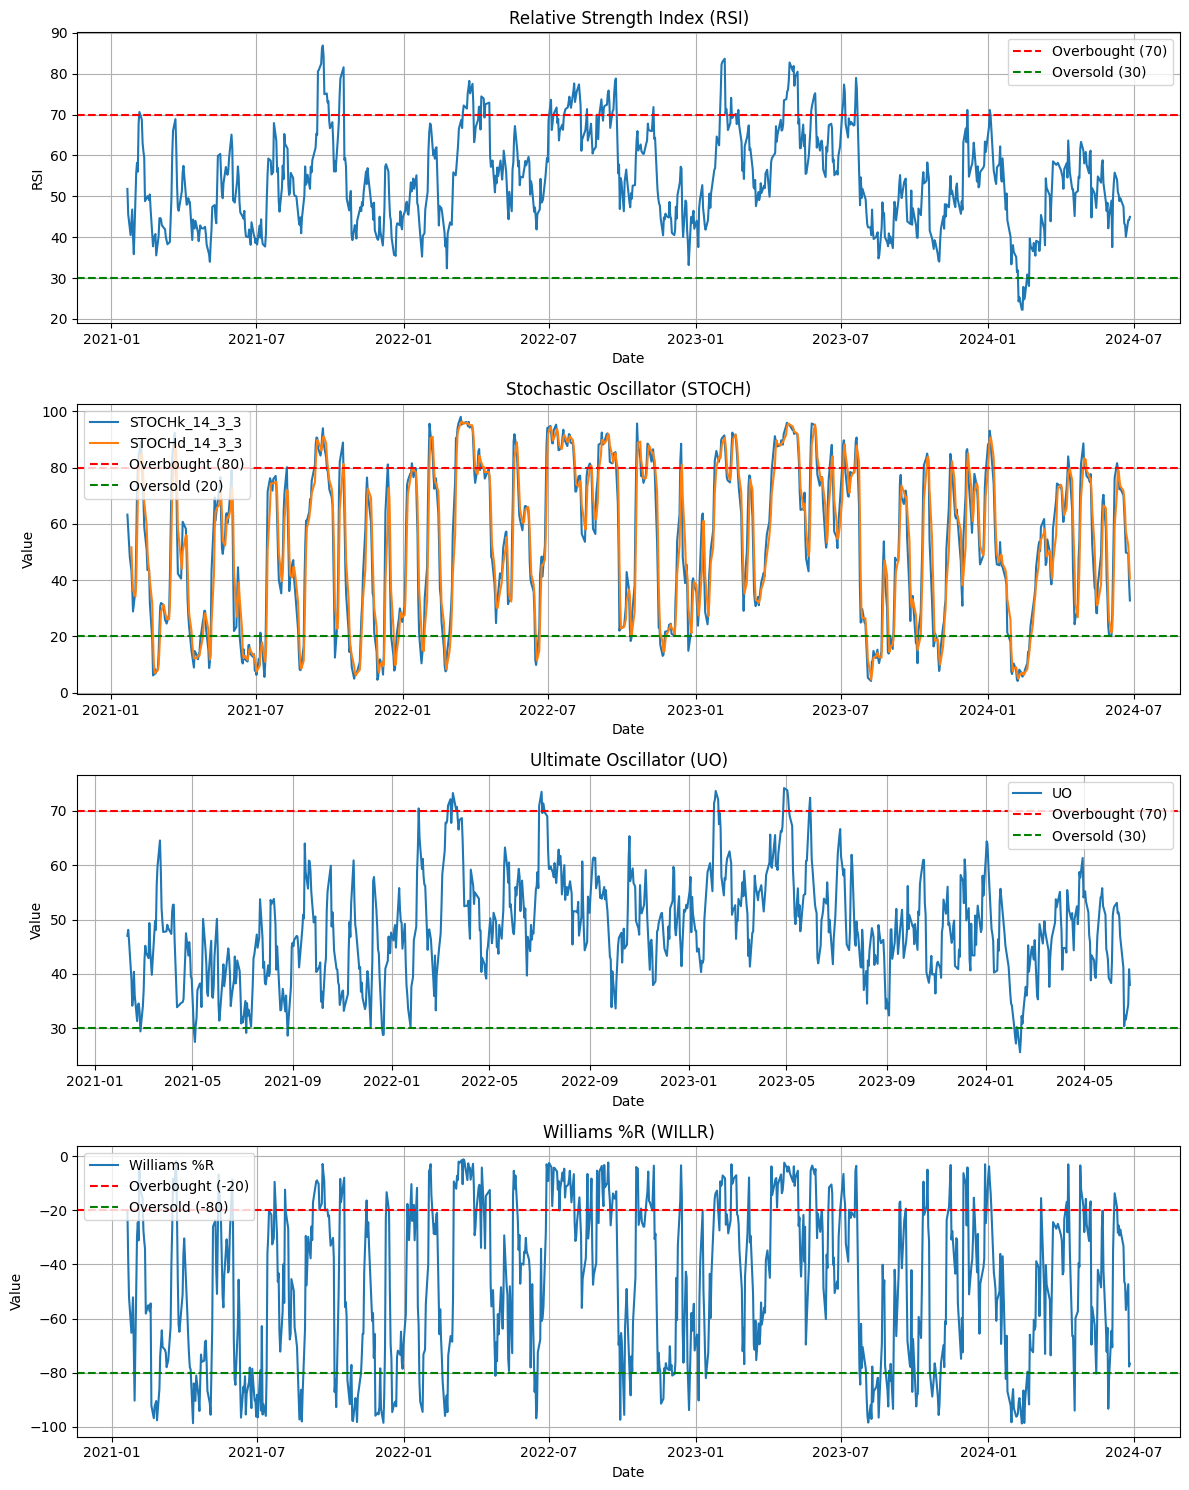

In [8]:
info.momentum_indicators()

In [9]:
info.calculate_latest_momentum_values()

Momentum Indicator,Latest Value,Signal
RSI_14,44.976587,Hold
STOCHk_14_3_3,32.776211,Hold
STOCHd_14_3_3,40.559232,Hold
UO_7_14_28,37.959385,Hold
WILLR_14,-76.623279,Hold


**Forecasting System**

In [13]:
#import basic model libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [14]:
#import required libraries for forecasting a next closing price value

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import LinearSVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

In [15]:
#create a variable list models that store the different models

models = []

models.append(('Random Forest',RandomForestRegressor(criterion = 'absolute_error', bootstrap = True, n_estimators = 100)))
models.append(('Gradient Boosting', GradientBoostingRegressor(n_estimators = 100, criterion = 'friedman_mse', loss='squared_error')))
models.append(('SVR', LinearSVR(loss = 'squared_epsilon_insensitive', max_iter=1000)))
models.append(('MLP', MLPRegressor( activation='relu', learning_rate='constant', hidden_layer_sizes=13)))
models.append(('KNeighbors', KNeighborsRegressor(n_neighbors = 9, algorithm = 'auto', weights = 'uniform')))

**TRAINING**

In [16]:

def train_models(stock):
    X = stock[['Open']]  # Input variable
    y = stock[['Close']] # Target variable

    trained_models = []

    for name, model in models:
        model.fit(X, y)
        trained_models.append((name, model))

    return trained_models
        

In [17]:
trained_models = train_models(stock_data)

**TESTING**

In [21]:
#getting input from the user

ticker_name = input("Enter the company's ticker here: ")
start_day = int(input("Enter the starting day: "))
start_month = int(input("Enter the starting month: "))
start_year = int(input("Enter the starting year: "))
interval = input("Enter the interval (ie. for day - '1d',month - '1mo', week - '1wk)': ")

test_stock_data = get_stock_data(ticker_name, start_year, start_month, start_day, interval)

Enter the company's ticker here:  RELIANCE.NS
Enter the starting day:  1
Enter the starting month:  1
Enter the starting year:  2021
Enter the interval (ie. for day - '1d',month - '1mo', week - '1wk)':  1d


In [22]:
test_stock_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-01,1834.923340,1843.230347,1829.385376,1834.461914,1815.729614,5007587
1,2021-01-04,1841.476685,1844.984009,1816.463379,1837.553955,1818.790039,12256767
2,2021-01-05,1817.386353,1830.862183,1805.387329,1814.709717,1796.179077,12061545
3,2021-01-06,1814.525024,1814.617310,1758.452881,1766.852173,1748.810181,23200734
4,2021-01-07,1772.620850,1795.234375,1758.452881,1763.990845,1745.978027,16162959
...,...,...,...,...,...,...,...
854,2024-06-20,2918.000000,2965.699951,2900.199951,2947.399902,2947.399902,8056888
855,2024-06-21,2947.250000,2949.399902,2881.149902,2908.399902,2908.399902,15585180
856,2024-06-24,2891.050049,2899.000000,2875.000000,2882.949951,2882.949951,4439193
857,2024-06-25,2886.000000,2911.850098,2882.000000,2908.300049,2908.300049,3522693


In [23]:
def test_models(stock, trained_models):
    X_test = stock[['Open']]  # Input variable
    y_test = stock[['Close']] # Target variable
    
    accuracy = {}  # Dictionary to store the accuracy of each model
    predictions = []  # To store predictions for each model

    for name, model in trained_models:
        y_pred = model.predict(X_test)
        predictions.append((name, y_pred))
        r2 = r2_score(y_test, y_pred)
        accuracy[name] = r2

    plt.figure(figsize = (15, 5))
    plt.plot(y_test, label = 'close')
    #plt.plot(predictions[0][1], label = 'rf', color = 'orange')
    #plt.plot(predictions[1][1], label = 'gb', color = 'yellow')
    plt.plot(predictions[2][1], label = 'svr', color = 'green', linestyle = '--')
    plt.plot(predictions[3][1], label = 'mlp', color = 'red', linestyle = '--')
    #plt.plot(predictions[4][1], label = 'knn', color = 'black')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    r2_result = pd.DataFrame([accuracy], index=['R2_Score'])
    
    return r2_result, predictions

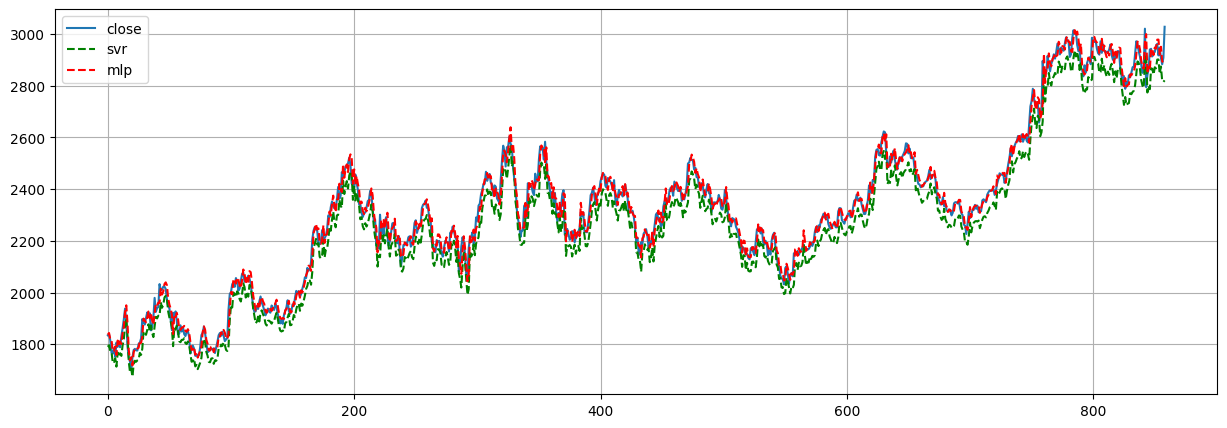

In [24]:
test_result1, predict= test_models(test_stock_data, trained_models)

In [25]:
print("Model Accuracy:")
test_result1

Model Accuracy:


,Random Forest,Gradient Boosting,SVR,MLP,KNeighbors
R2_Score,-37.89948,-38.075089,0.952459,0.988224,-37.919625


In [26]:
#prediction result for mlp
'''similarly for other alogrihtms:
    predictions[0][1], label = 'rf'
    predictions[1][1], label = 'gb'
    predictions[2][1], label = 'svr'
    predictions[3][1], label = 'mlp'
    predictions[4][1], label = 'knn'
'''
algo_result = predict[3][1]

In [27]:
algo_result[-1]

2895.492929300662

statistical summarization of data
                                Date         Open         High          Low  \
count                            859   859.000000   859.000000   859.000000   
mean   2022-09-26 11:57:29.126892032  2320.559013  2342.802620  2297.566020   
min              2021-01-01 00:00:00  1716.225586  1758.314331  1689.089355   
25%              2021-11-15 12:00:00  2168.195434  2185.340088  2142.674439   
50%              2022-09-26 00:00:00  2312.114258  2329.399902  2295.100098   
75%              2023-08-07 12:00:00  2445.972290  2465.375000  2422.299926   
max              2024-06-26 00:00:00  3011.550049  3037.949951  2974.449951   
std                              NaN   298.534939   300.867247   297.011625   

             Close    Adj Close        Volume  
count   859.000000   859.000000  8.590000e+02  
mean   2319.677815  2309.712871  7.357286e+06  
min    1700.119263  1682.758789  8.528280e+05  
25%    2167.041748  2157.343506  4.721840e+06  
50%    2310.26

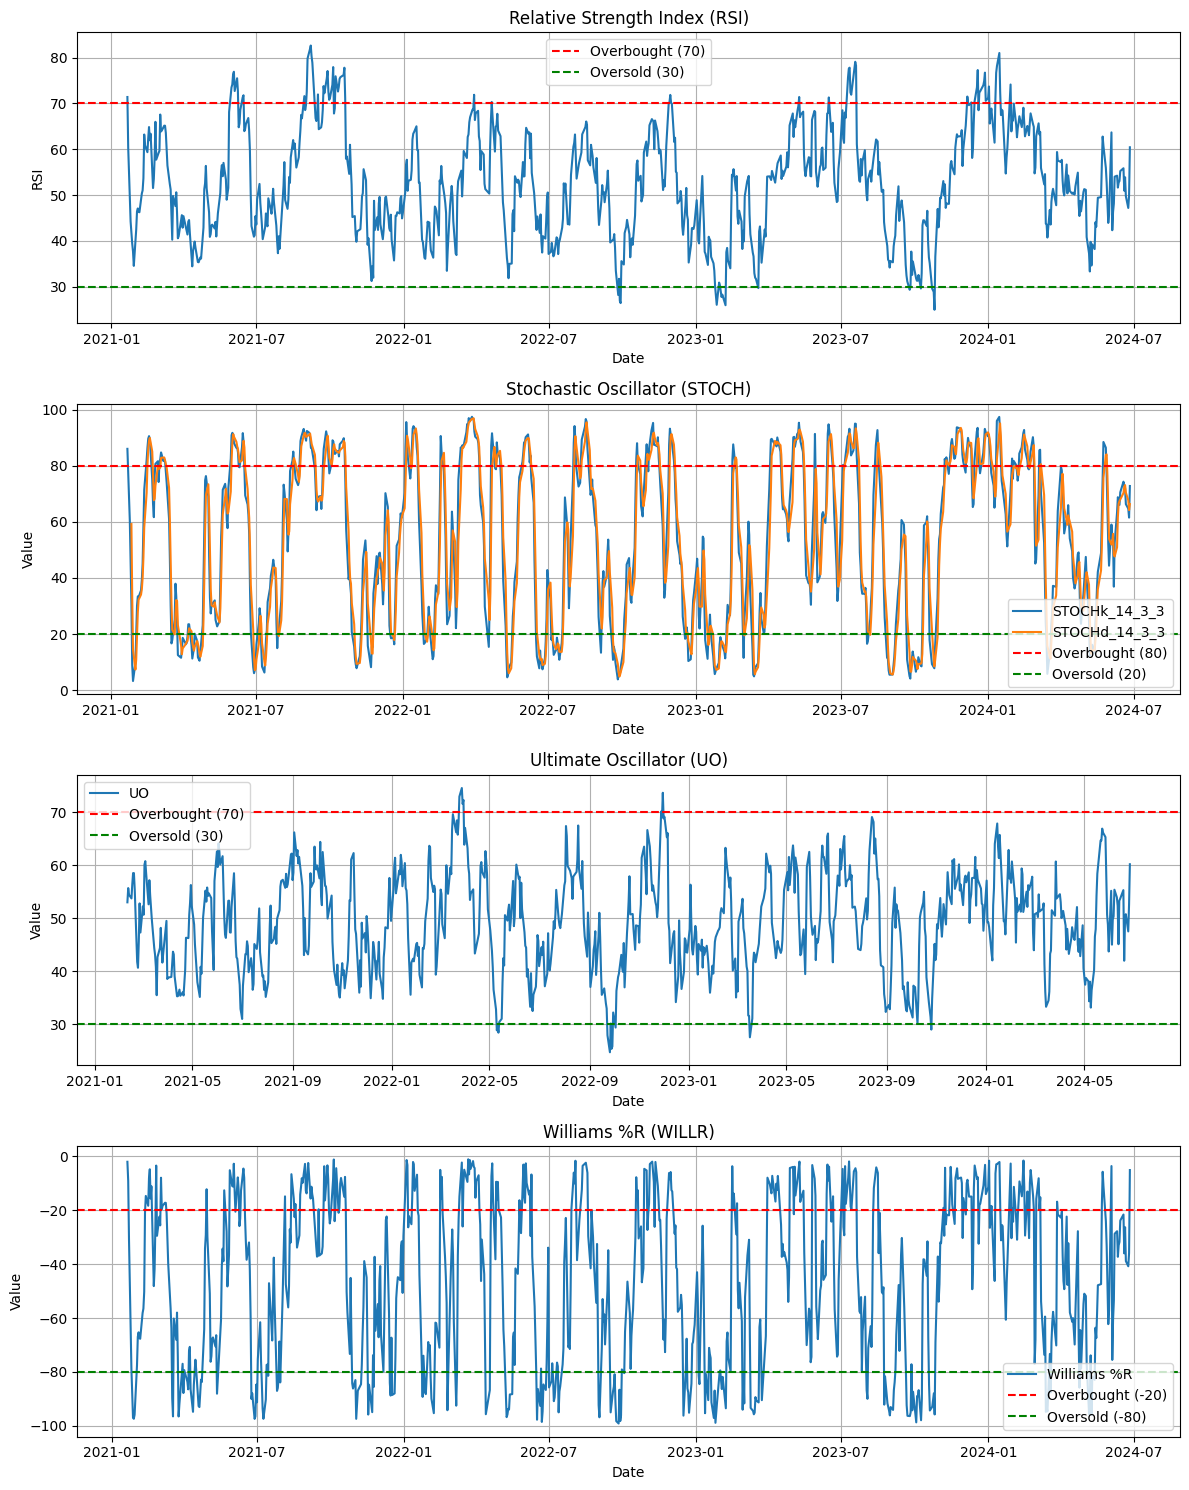

Momentum Indicator,Latest Value,Signal
RSI_14,60.442214,Hold
STOCHk_14_3_3,72.757946,Sell
STOCHd_14_3_3,66.316472,Hold
UO_7_14_28,60.157263,Hold
WILLR_14,-5.070372,Sell


In [28]:
lic = stock_analysis(test_stock_data)
lic.stock_info()
lic.momentum_indicators()
lic.calculate_latest_momentum_values()

**Result:**

Based on the result of Technical Analysis and prediction value, recommed to the user for buy/sell